In [ ]:
<!-- wp:paragraph -->
<p>The context is that there is an online platform offering product or service from multiple merchants. At the merchant level, when it comes to customer acquisition, there are 2 kinds of approaches we want to look at. The first one is how merchant acquires completely new customers who never existed before on the platform. The second one is how merchant acquires existing customers from other merchants.</p>
<!-- /wp:paragraph -->

<!-- wp:paragraph -->
<p>Below is the code on python to solve the second situation which is "how merchant acquires existing customers from other merchants".</p>
<!-- /wp:paragraph -->

In [2]:
# In the dataframe, please note that we only select the customers who purchased at least 2 different merchants
import pandas as pd
df = pd.read_csv('C:/Users/Nguyen Thai Phong/Desktop/data/existing_customer_acquisition.csv')

In [3]:
df['Date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [4]:
df.head()

,fk_customer,id_merchant,merchant_name,date,now,year,month,timestamp,merchant_ranking,Date
0,01b40c65-7f74-4052-ad92-3ccd963a6299,I406,406,2022-04-09,2022-06-14,2022,4,2022-04-09,1,2022-04-09
1,01b40c65-7f74-4052-ad92-3ccd963a6299,I197,197,2022-05-31,2022-06-14,2022,5,2022-05-31,2,2022-05-31
2,01b40bff-2d6c-413b-ab00-1f0129c986d2,I200,200,2021-09-13,2022-06-14,2021,9,2021-09-13,1,2021-09-13
3,01b40bff-2d6c-413b-ab00-1f0129c986d2,I423,423,2021-09-28,2022-06-14,2021,9,2021-09-28,2,2021-09-28
4,01b3d922-6d23-445c-914b-684d3ccdaa98,I406,406,2021-11-25,2022-06-14,2021,11,2021-11-25,1,2021-11-25


In [5]:
from datetime import datetime, timedelta

start_date ='2022-06-01'
start_date=datetime.fromisoformat(start_date).date()
end_date = datetime.strftime(datetime.now() - timedelta(1), '%Y-%m-%d')
end_date=datetime.fromisoformat(end_date).date()

In [6]:
import datetime

df_append = []

while (start_date  <= end_date):

    df_s=df[df["Date"]== start_date.strftime('%Y-%m-%d')]
    df_before=df[df["Date"] < start_date.strftime('%Y-%m-%d')]    
    
    df1 = df_s[['fk_customer','id_merchant','merchant_name','Date']].drop_duplicates()
    df1.reset_index(drop=True)
    df1.rename(columns = {'merchant_name':'new'}, inplace = True)
    df_before = df_before[['fk_customer','id_merchant','merchant_name']].drop_duplicates()

    df2 = df_before.groupby(["fk_customer"])['merchant_name'].apply(list).reset_index(name='old')
    df3=df1.merge(df2,on=['fk_customer'], how='left')

    df3['new'] = df3['new'].astype(str)
    df3['old'] = df3['old'].astype(str)

    df3['old'] = df3["old"].str.replace("]","")
    df3['old'] = df3["old"].str.replace("[","")
    df3['old'] = df3["old"].str.replace("'","")

    df3['flag'] = df3.apply(lambda x: x.new in x.old, axis=1)   
    
    # filter the existing customers acquisition
    df4 = df3[df3['flag'] == False ]

    # counting the number of existing customer acquisition by merchant
    df5 = df4.groupby(['Date','new'])['fk_customer'].nunique().to_frame(name = 'count').reset_index()

    df_append.append(df5)
    
    
    start_date = start_date + datetime.timedelta(days=1) 

 

C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_20024/2959973059.py:21: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3['old'] = df3["old"].str.replace("]","")
C:\Users\NGUYEN~1\AppData\Local\Temp/ipykernel_20024/2959973059.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df3['old'] = df3["old"].str.replace("[","")


In [7]:
df6 = pd.concat(df_append)
df7 = df6.groupby('Date')['count'].sum()
df8 = pd.DataFrame(df7)

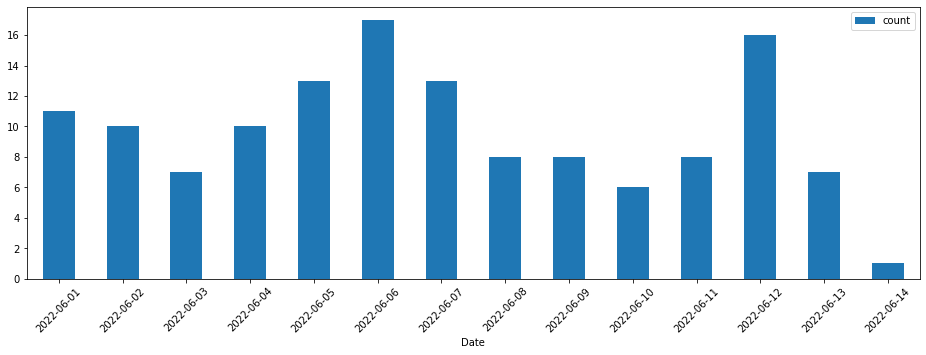

In [8]:
# plot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
df8.plot(kind="bar", figsize=(16,5), stacked=True, ax=ax)

# format xtick-labels with list comprehension
ax.set_xticklabels([x.strftime("%Y-%m-%d") for x in df8.index], rotation=45)
plt.show()